In [1]:
import json
import matplotlib.pyplot as plt

with open('results_exp3.json', 'r') as f:
        results_data = json.load(f)

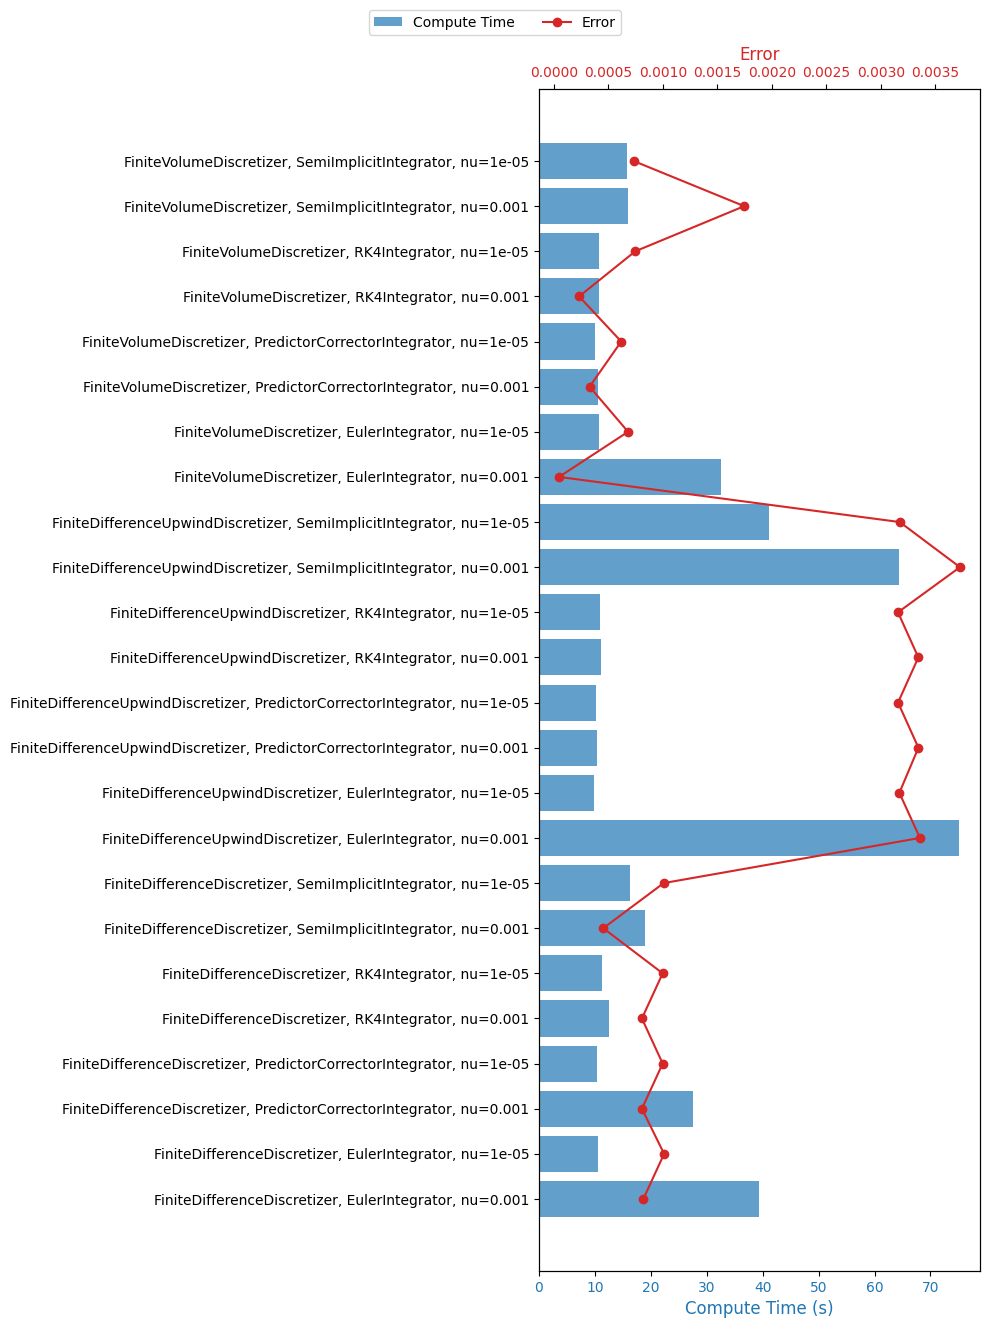

In [9]:
config_labels = [f"{r.get('discretizer', 'N/A')}, {r.get('integrator', 'N/A')}, nu={r.get('nu', 'N/A')}" for r in results_data]
y_values = list(range(1, len(config_labels) + 1))

compute_times_data = []
error_data = []

for r in results_data:
    ct = r.get('compute_time')
    compute_times_data.append(ct if isinstance(ct, (int, float)) else float('nan'))
    
    err = r.get('error')
    error_data.append(err if isinstance(err, (int, float)) else float('nan'))

fig, ax1 = plt.subplots(figsize=(10, 14)) 
color_time = 'tab:blue'

# Compute time
ax1.set_xlabel('Compute Time (s)', color=color_time, fontsize=12)
bar_plot = ax1.barh(y_values, compute_times_data, color=color_time, alpha=0.7, label='Compute Time')
ax1.tick_params(axis='x', labelcolor=color_time)
ax1.set_yticks(y_values)
ax1.set_yticklabels(config_labels, rotation=0, ha='right', fontsize=10) # Horizontal labels

# Error
ax2 = ax1.twiny()
color_error = 'tab:red'
ax2.set_xlabel('Error', color=color_error, fontsize=12)
line_plot = ax2.plot(error_data, y_values, color=color_error, marker='o', linestyle='-', label='Error')
ax2.tick_params(axis='x', labelcolor=color_error)

handles, labels = [], []
handles.append(bar_plot)
labels.append('Compute Time')
handles.extend(line_plot)
labels.append('Error')

fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.95), ncol=2)
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.savefig("plot_exp3.pdf", format="pdf", bbox_inches="tight")
plt.show()